# Analyse simulations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="ticks", color_codes=True)

from e_sim.utils import compute_avg_cost, agg_data, sensitivity_cost, sensitivity_plot

<IPython.core.display.Javascript object>

## Get all output files and set parameters

We need the aggregated output files of all simulations.

In [3]:
path_experiment = "../output/experiments/"

<IPython.core.display.Javascript object>

In [4]:
costs = {"backorder": 0.4, "holding": 0.02, "c_service": 1, "c_repair": 2}

settings = {
    "demand_rate": [1],
    "repair_rate": [0.5],
    "Q_service": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Q_repair": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "S_depot": [1],
    "S_warehouse": [2],
    "init_stock_depot": [2, 4],
    "init_stock_warehouse": [2, 8],
}

<IPython.core.display.Javascript object>

In [5]:
df_agg = pd.read_csv(
    f"{path_experiment}sim_data_agg.csv", index_col=list(settings.keys())
)
df_agg

avg_backorder  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                  
1           0.5         1         1        0       5           1                1                          0.400512   
                                                   4           1                1                          0.495304   
                                                   3           1                1                          0.731615   
                                           1       0           1                1                          1.692458   
                                           0       2           1                1                          1.114116   
...                                                                                                             ...   
                        8         8        4       4           1                1                          3.625121   
                                                   5           1                1                          3.188929   
                                           5       3           1                1                          3.196260   
                                                   4           1                1                          2.787423   
                                                   5           1                1                          2.393455   

                                                                                                      avg_stock  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse              
1           0.5         1         1        0       5           1                1                             2   
                                                   4           1                1                             2   
                                                   3           1                1                             2   
                                           1       0           1                1                             2   
                                           0       2           1                1                             2   
...                                                                                                         ...   
                        8         8        4       4           1                1                             2   
                                                   5           1                1                             2   
                                           5       3           1                1                             2   
                                                   4           1                1                             2   
                                                   5           1                1                             2   

                                                                                                        demand_type  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                  
1           0.5         1         1        0       5           1                1                     Dists.POISSON   
                                                   4           1                1                     Dists.POISSON   
                                                   3           1                1                     Dists.POISSON   
                                           1       0           1                1                     Dists.POISSON   
                                           0       2           1                1                     Dists.POISSON   
...                                                                                                             ...   
                        8         8        4       4           1                1                     Dist

<IPython.core.display.Javascript object>

From this we can compute the cost components of all simulations using the specified settings.

In [6]:
df_avg_cost = df_agg.groupby(list(settings.keys())).apply(compute_avg_cost, costs)
df_avg_cost

holding_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                 
1           0.5         1         1        0       5           1                1                             0.04   
                                                   4           1                1                             0.04   
                                                   3           1                1                             0.04   
                                           1       0           1                1                             0.04   
                                           0       2           1                1                             0.04   
...                                                                                                            ...   
                        8         8        4       4           1                1                             0.04   
                                                   5           1                1                             0.04   
                                           5       3           1                1                             0.04   
                                                   4           1                1                             0.04   
                                                   5           1                1                             0.04   

                                                                                                      back_order_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                    
1           0.5         1         1        0       5           1                1                            0.160205   
                                                   4           1                1                            0.198121   
                                                   3           1                1                            0.292646   
                                           1       0           1                1                            0.676983   
                                           0       2           1                1                            0.445647   
...                                                                                                               ...   
                        8         8        4       4           1                1                            1.450048   
                                                   5           1                1                            1.275572   
                                           5       3           1                1                            1.278504   
                                                   4           1                1                            1.114969   
                                                   5           1                1                            0.957382   

                                                                                                      setup_repair_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                      
1           0.5         1         1        0       5           1                1                              1.951943   
                                                   4           1                1                              1.951943   
                                                   3           1                1                              1.951943   
                                           1       0           1                1                              1.951943   
                                           0       2           1                1                              1.951943   
...                                                                                                                 ...   
         

<IPython.core.display.Javascript object>

## Plot average cost as a function of the different batch sizes

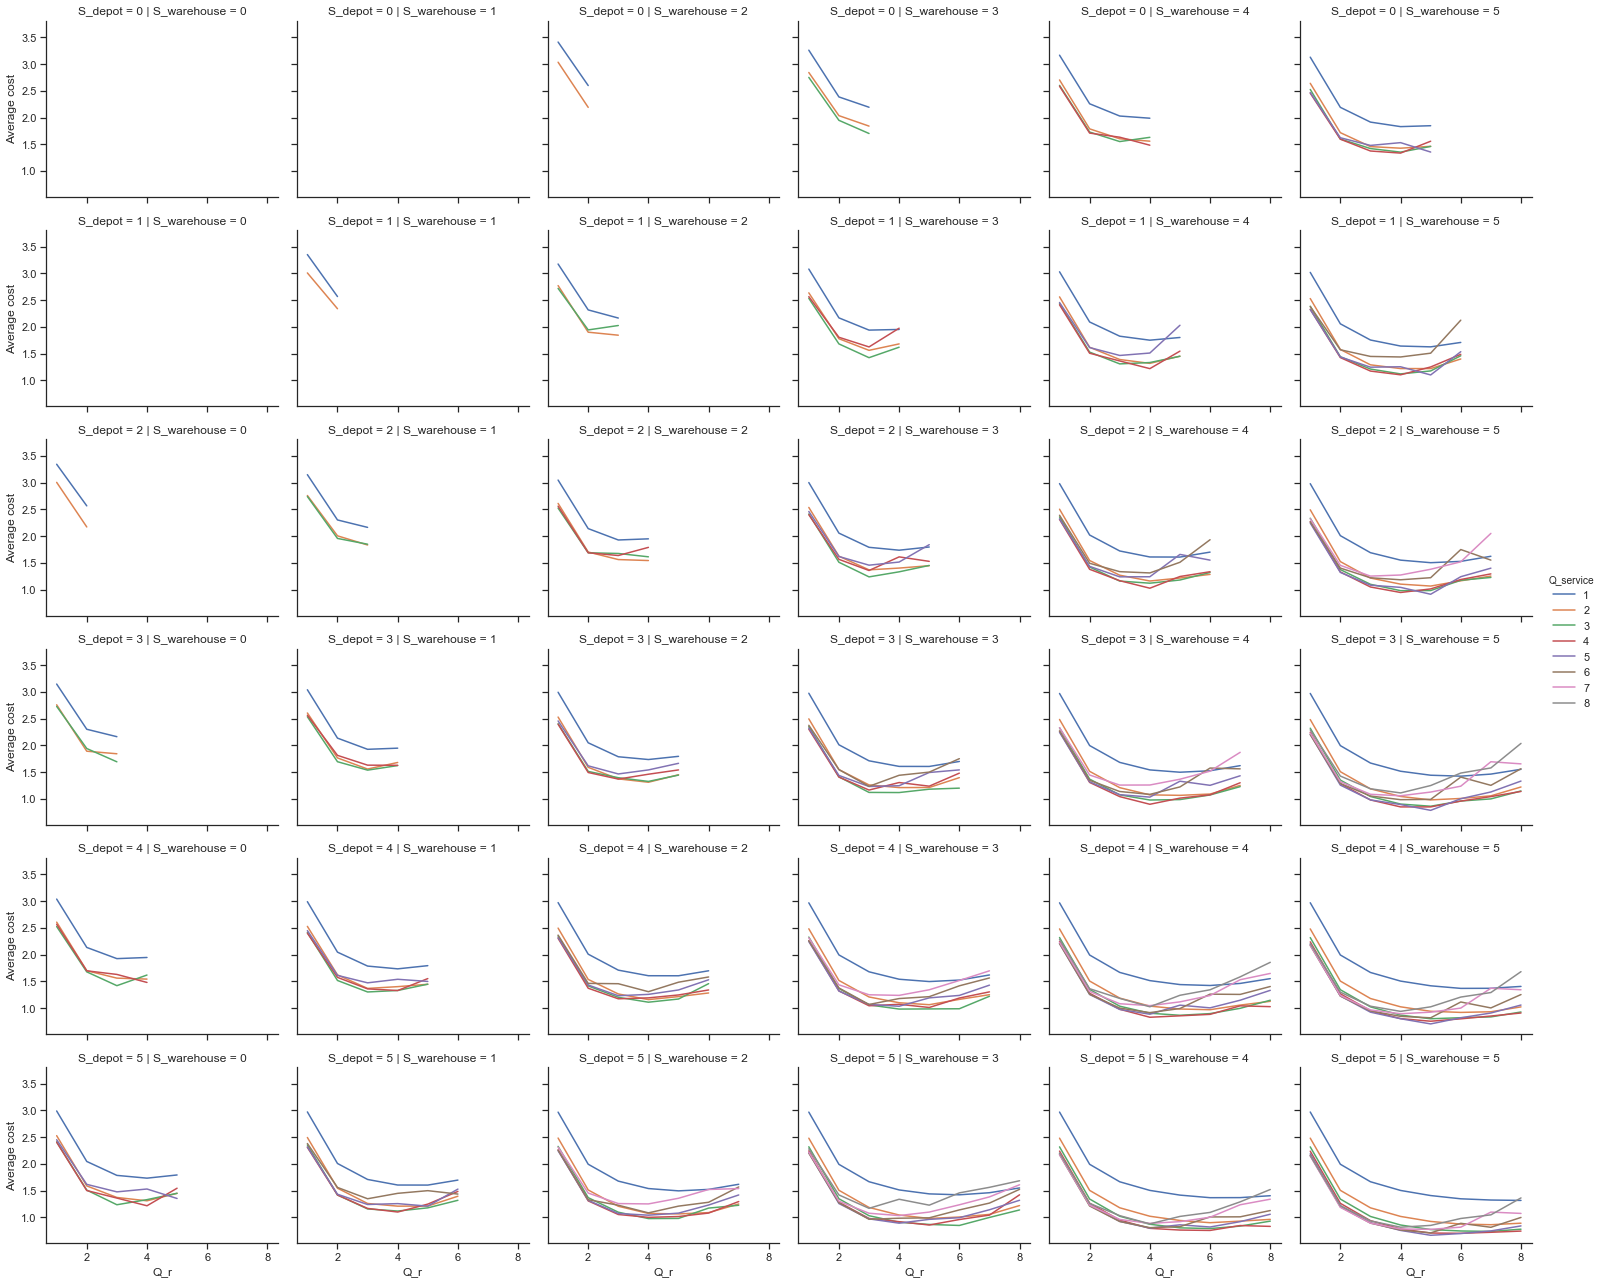

<IPython.core.display.Javascript object>

In [7]:
# Reset index variables
df_avg_cost_plot = df_avg_cost.reset_index()
df_avg_cost_plot.columns

g = sns.FacetGrid(
    df_avg_cost_plot,
    row="S_depot",
    col="S_warehouse",
    hue="Q_service",
    aspect=1.2,
    sharey=True,
)
g.map(plt.plot, "Q_repair", "average_cost").add_legend().set_axis_labels(
    "Q_r", "Average cost"
)

## Optimal batch size

In [8]:
# Group by all settings except batch sizes
settings_wo_batch = [
    setting
    for setting in settings.keys()
    if setting != "Q_service"
    and setting != "Q_repair"
    and setting != "S_depot"
    and setting != "S_warehouse"
]

df_opt_batch = df_avg_cost.loc[
    df_avg_cost.groupby(settings_wo_batch)["average_cost"].idxmin()
]
df_opt_batch = df_opt_batch.reset_index().set_index(settings_wo_batch)

df_opt_batch

,,,,Q_service,Q_repair,S_depot,S_warehouse,holding_cost,back_order_cost,setup_repair_cost,setup_service_cost,average_cost
demand_rate,repair_rate,init_stock_depot,init_stock_warehouse,,,,,,,,,
1,0.5,1,1,5,5,5,5,0.04,0.038525,0.389974,0.194987,0.663487


<IPython.core.display.Javascript object>

## Sensitivity analysis w.r.t. cost parameters

In [9]:
cost_ranges = {
    "backorder": np.linspace(0, 1),
    "holding": np.linspace(0, 1),
    "c_service": np.linspace(0, 5),
    "c_repair": np.linspace(0, 5),
}

<IPython.core.display.Javascript object>

In [10]:
df_sensitivity = df_agg.groupby(list(settings.keys())).apply(
    sensitivity_cost, costs, cost_ranges
)
df_sensitivity.head()

cost_par  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                
1           0.5         1         1        0       1           1                1                    0  backorder   
                                                                                                     1  backorder   
                                                                                                     2  backorder   
                                                                                                     3  backorder   
                                                                                                     4  backorder   

                                                                                                        cost_par_vals  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                    
1           0.5         1         1        0       1           1                1                    0       0.000000   
                                                                                                     1       0.020408   
                                                                                                     2       0.040816   
                                                                                                     3       0.061224   
                                                                                                     4       0.081633   

                                                                                                        holding_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                   
1           0.5         1         1        0       1           1                1                    0          0.04   
                                                                                                     1          0.04   
                                                                                                     2          0.04   
                                                                                                     3          0.04   
                                                                                                     4          0.04   

                                                                                                        back_order_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                      
1           0.5         1         1        0       1           1                1                    0         0.000000   
                                                                                                     1         0.035453   
                                                                                                     2         0.070905   
                                                                                                     3         0.106358   
                                                                                                     4         0.141811   

                                                                                                        setup_service_cost  \
demand_rate repair_rate Q_service Q_repair S_depot S_warehouse init_stock_depot init_stock_warehouse                         
1           0.5         1         1        0       1           1                1                    0            0.972972   
                                                                                                     1            0.972972   
                                                                                                     2            0.972972   
                                                                                                     3  

<IPython.core.display.Javascript object>

**Update: Sensitivity analysis should be considered under the optimal policy**

Below we compute the optimal inventory control policies concerning $Q_s$, $Q_r$, $S_D$ and $S_W$ for all combinations of the `settings_wo_batch` variables. We then plot the average cost for these optimal policies for the sensitivity analysis w.r.t. cost parameters.

In [14]:
sets_batch = settings_wo_batch + ["cost_par", "cost_par_vals"]

df_sensitivity = df_sensitivity.reset_index()
df_opt_batch_sens = df_sensitivity.loc[
    df_sensitivity.groupby(sets_batch)["average_cost"].idxmin()
]
df_opt_batch_sens = df_opt_batch_sens.reset_index().set_index(settings_wo_batch)

df_opt_batch_sens

level_0  \
demand_rate repair_rate init_stock_depot init_stock_warehouse            
1           0.5         1                1                      206800   
                                         1                      207801   
                                         1                      198202   
                                         1                      198203   
                                         1                      181804   
...                                                                ...   
                                         1                      155695   
                                         1                      155696   
                                         1                      155697   
                                         1                      155698   
                                         1                      155699   

                                                                index  \
demand_rate repair_rate init_stock_depot init_stock_warehouse           
1           0.5         1                1                     206800   
                                         1                     207801   
                                         1                     198202   
                                         1                     198203   
                                         1                     181804   
...                                                               ...   
                                         1                     155695   
                                         1                     155696   
                                         1                     155697   
                                         1                     155698   
                                         1                     155699   

                                                               Q_service  \
demand_rate repair_rate init_stock_depot init_stock_warehouse              
1           0.5         1                1                             8   
                                         1                             8   
                                         1                             7   
                                         1                             7   
                                         1                             6   
...                                                                  ...   
                                         1                             5   
                                         1                             5   
                                         1                             5   
                                         1                             5   
                                         1                             5   

                                                               Q_repair  \
demand_rate repair_rate init_stock_depot init_stock_warehouse             
1           0.5         1                1                            8   
                                         1                            8   
                                         1                            8   
                                         1                            8   
                                         1                            7   
...                                                                 ...   
                                         1                            5   
                                         1                            5   
                                         1                            5   
                                         1                            5   
                                         1                            5   

                                                               S_depot  \
demand_rate repair_rate init_stock_depot init_stock_warehouse            
1           0.5         1            

<IPython.core.display.Javascript object>

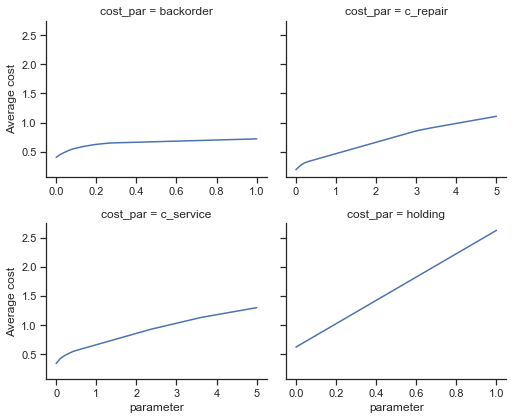

<IPython.core.display.Javascript object>

In [13]:
for cols, df in df_opt_batch_sens.groupby(settings_wo_batch):
    sensitivity_plot(df)

Increasing the back-order cost first has a large effect on the average cost of the optimal policy but this increase diminishes around $b = 0.2$. An explanation is that the optimal policy for high back-order cost involves almost no back-orders. Increasing the back-order costs further will therefore not result in a significant increase in the average cost.

For the holding cost we see that the average cost increases proportionally with the holding cost $h$. 